# 모델 학습 결과로 인해 구분된 집단들에 대한 특징을 분석해볼 것이다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
with open("../data/test_result_data.json") as f:
    test_result_data = json.load(f)

In [3]:
test_result_data.keys()

dict_keys(['gasf_at', 'gasf_rat', 'gasf_sat', 'gadf_at', 'gadf_rat', 'gadf_sat'])

In [4]:
for feature in test_result_data.keys():
    loss = []
    word = "공급온도"
    for key, val in test_result_data[feature].items():
        loss.append(val[1][0])

    if feature[:4] == "gasf":
        if feature[5:] == "at":
            word = "외부온도"
        elif feature[5:] == "rat":
            word = "순환온도"
        print(f"GASF방식으로 전처리한 {word}의 테스트셋 MSE 평균: {np.mean(loss):.4f}")

    if feature[:4] == "gadf":
        if feature[5:] == "at":
            word = "외부온도"
        elif feature[5:] == "rat":
            word = "순환온도"
        print(f"GADF방식으로 전처리한 {word}의 테스트셋 MSE 평균: {np.mean(loss):.4f}")

GASF방식으로 전처리한 외부온도의 테스트셋 MSE 평균: 0.4480
GASF방식으로 전처리한 순환온도의 테스트셋 MSE 평균: 0.3100
GASF방식으로 전처리한 공급온도의 테스트셋 MSE 평균: 0.3692
GADF방식으로 전처리한 외부온도의 테스트셋 MSE 평균: 0.2341
GADF방식으로 전처리한 순환온도의 테스트셋 MSE 평균: 0.2056
GADF방식으로 전처리한 공급온도의 테스트셋 MSE 평균: 0.2104


- GADF 방식의 loss가 더 작다.

In [52]:
loss_gadf = []

for key in list(test_result_data.keys())[3:]:
    loss = [x[1][0] for key, x in test_result_data[key].items()]
    idx = [x[1][1][0] for key, x in test_result_data[key].items()]
    reefer = [x[1][1][1] for key, x in test_result_data[key].items()]

    loss_gadf.append(np.array(loss))

In [53]:
loss_sum = list(loss_gadf[0] + loss_gadf[1] + loss_gadf[2])

In [57]:
loss_idx_reefer_id = pd.DataFrame({"loss":loss_sum, "index_list":idx, "reefer_id":reefer})

In [58]:
len(loss_idx_reefer_id)

101

In [59]:
loss_idx_reefer_id

,loss,index_list,reefer_id
0,0.451842,"[5225, 5226, 5227, 5228, 5229, 5230, 5231, 523...",BMOU9003717
1,0.678229,"[5502, 5503, 5504, 5505, 5506, 5507, 5508, 550...",BMOU9003717
2,0.533754,"[19211, 19212, 19213, 19214, 19215, 19216, 192...",BMOU9003717
3,0.716789,"[26691, 26692, 26693, 26694, 26695, 26696, 266...",RJCU6995820
4,0.690007,"[21156, 21157, 21158, 21159, 21160, 21161, 211...",RJCU6995820
...,...,...,...
96,0.671769,"[13470, 13471, 13472, 13473, 13474, 13475, 134...",RJCU6995820
97,0.800099,"[19979, 19980, 19981, 19982, 19983, 19984, 199...",RJCU6995820
98,0.717682,"[8194, 8195, 8196, 8197, 8198, 8199, 8200, 820...",RJCU6995820
99,0.687794,"[6023, 6024, 6025, 6026, 6027, 6028, 6029, 603...",RJCU6995820


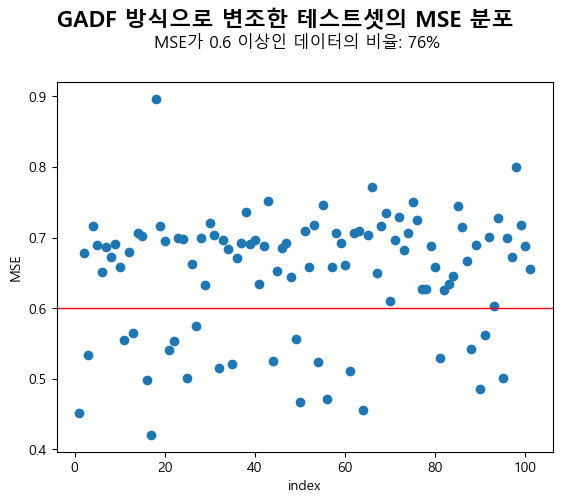

In [60]:
above_06_index = [idx for idx, x in enumerate(loss_sum) if x > 0.6]
bellow_06_index = [idx for idx, x in enumerate(loss_sum) if x <= 0.6]

precent = int((len(above_06_index) / len(loss_sum)) * 100)

plt.rcParams['font.family'] = "Malgun Gothic"
plt.scatter(x=range(1, len(loss_sum)+1), y=loss_sum)
plt.axhline(y=0.6, color='r', linewidth=1)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('GADF 방식으로 변조한 테스트셋의 MSE 분포', fontdict=title_font, loc='left', pad=40)
plt.suptitle('MSE가 0.6 이상인 데이터의 비율: 76%')
plt.ylabel("MSE")
plt.xlabel("index");

In [91]:
bellow_06_df = loss_idx_reefer_id.iloc[bellow_06_index]
bellow_06_min = bellow_06_df.loc[bellow_06_df['loss'].idxmin()]

In [92]:
above_06_df = loss_idx_reefer_id.iloc[above_06_index]
above_06_max = above_06_df.loc[above_06_df['loss'].idxmax()]

In [88]:
df = pd.read_csv('../data/carrier_reefer_data_01_to_08_and_12.csv')

In [89]:
# 문자열을 datetime으로 변경
import datetime

df['when_created'] = df['when_created'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [94]:
bellow_06_min['reefer_id']

'BMOU9003717'

In [98]:
df_tmp = df.loc[df['reefer_id'] == bellow_06_min['reefer_id']].reset_index(drop=True)

In [100]:
# MSE가 최소인 데이터
df_tmp.iloc[bellow_06_min['index_list']]

,alarm_codes,ambient_temperature,made_cd,operating_mode,operating_mode_str,reefer_id,return_air_temperature,supply_air_temperature,temperature_setpoint,when_created
18401,NaN,23.95,CARRIER,3.0,COOL,BMOU9003717,-19.40,-19.85,-20.0,2022-08-17 03:48:32
18402,NaN,23.37,CARRIER,3.0,COOL,BMOU9003717,-19.85,-24.65,-20.0,2022-08-17 03:58:40
18403,NaN,23.42,CARRIER,6.0,IDLE,BMOU9003717,-20.15,-24.62,-20.0,2022-08-17 04:08:57
18404,NaN,23.58,CARRIER,3.0,COOL,BMOU9003717,-19.60,-24.58,-20.0,2022-08-17 04:19:09
18405,NaN,23.23,CARRIER,3.0,COOL,BMOU9003717,-18.82,-20.94,-20.0,2022-08-17 04:29:24
18406,NaN,23.68,CARRIER,3.0,COOL,BMOU9003717,-19.99,-24.75,-20.0,2022-08-17 04:39:37
18407,NaN,23.27,CARRIER,3.0,COOL,BMOU9003717,-19.00,-20.68,-20.0,2022-08-17 04:49:49
18408,NaN,23.79,CARRIER,3.0,COOL,BMOU9003717,-19.96,-24.74,-20.0,2022-08-17 05:00:01
18409,NaN,23.20,CARRIER,3.0,COOL,BMOU9003717,-19.48,-24.44,-20.0,2022-08-17 05:10:17
18410,NaN,23.42,CARRIER,3.0,COOL,BMOU9003717,-19.92,-24.82,-20.0,2022-08-17 05:20:26


In [101]:
df_tmp = df.loc[df['reefer_id'] == above_06_max['reefer_id']].reset_index(drop=True)

In [102]:
# MSE가 최대인 데이터
df_tmp.iloc[above_06_max['index_list']]

,alarm_codes,ambient_temperature,made_cd,operating_mode,operating_mode_str,reefer_id,return_air_temperature,supply_air_temperature,temperature_setpoint,when_created
1044,NaN,99.88,CARRIER,6.0,IDLE,TRIU6681373,-20.10,-20.21,-20.0,2022-12-11 16:30:22
1045,NaN,NaN,CARRIER,3.0,COOL,TRIU6681373,-19.81,-19.70,-20.0,2022-12-11 16:40:51
1046,NaN,82.58,CARRIER,3.0,COOL,TRIU6681373,-19.74,-22.07,-20.0,2022-12-11 16:50:56
1047,NaN,94.53,CARRIER,6.0,IDLE,TRIU6681373,-20.29,-24.75,-20.0,2022-12-11 17:00:57
1048,NaN,NaN,CARRIER,6.0,IDLE,TRIU6681373,-20.39,-21.15,-20.0,2022-12-11 17:11:27
1049,NaN,69.88,CARRIER,6.0,IDLE,TRIU6681373,-20.20,-20.37,-20.0,2022-12-11 17:21:31
1050,NaN,NaN,CARRIER,6.0,IDLE,TRIU6681373,-19.97,-19.88,-20.0,2022-12-11 17:32:02
1051,NaN,75.43,CARRIER,6.0,IDLE,TRIU6681373,-19.84,-19.69,-20.0,2022-12-11 17:42:34
1052,NaN,NaN,CARRIER,3.0,COOL,TRIU6681373,-19.77,-19.56,-20.0,2022-12-11 17:52:36
1053,NaN,81.77,CARRIER,3.0,COOL,TRIU6681373,-19.73,-20.22,-20.0,2022-12-11 18:02:36


In [103]:
above_06_df = loss_idx_reefer_id.iloc[above_06_index]

In [116]:
idx = above_06_df.loc[above_06_df['loss']> 0.8].index

In [119]:
aa = above_06_df.loc[above_06_df.loc[above_06_df['loss']> 0.8].index].iloc[1]

In [120]:
df_tmp = df.loc[df['reefer_id'] == aa['reefer_id']].reset_index(drop=True)

In [121]:
# MSE가 두 번째로 큰 데이터
df_tmp.iloc[aa['index_list']]

,alarm_codes,ambient_temperature,made_cd,operating_mode,operating_mode_str,reefer_id,return_air_temperature,supply_air_temperature,temperature_setpoint,when_created
19979,NaN,34.48,CARRIER,3.0,COOL,RJCU6995820,-11.18,-15.35,-20.0,2022-06-17 13:26:39
19980,NaN,32.85,CARRIER,3.0,COOL,RJCU6995820,-9.89,-14.72,-20.0,2022-06-17 13:36:41
19981,NaN,34.47,CARRIER,3.0,COOL,RJCU6995820,-10.84,-16.53,-20.0,2022-06-17 13:46:46
19982,NaN,33.80,CARRIER,3.0,COOL,RJCU6995820,7.88,-4.24,-20.0,2022-06-17 13:57:17
19983,NaN,34.90,CARRIER,3.0,COOL,RJCU6995820,-1.05,-5.15,-20.0,2022-06-17 14:07:21
19984,NaN,33.73,CARRIER,3.0,COOL,RJCU6995820,2.30,-8.83,-20.0,2022-06-17 14:17:26
19985,NaN,34.24,CARRIER,3.0,COOL,RJCU6995820,-7.82,-15.75,-20.0,2022-06-17 14:27:52
19986,NaN,32.11,CARRIER,5.0,DEFROST,RJCU6995820,4.27,-9.94,-20.0,2022-06-17 14:37:54
19987,NaN,29.72,CARRIER,5.0,DEFROST,RJCU6995820,1.45,-7.91,-20.0,2022-06-17 14:48:00
19988,NaN,28.46,CARRIER,5.0,DEFROST,RJCU6995820,2.86,-6.44,-20.0,2022-06-17 14:58:26
